
Task 1: Stock Data Analysis

Step 1: Fetch Historical Stock Data
We use the yfinance library to fetch the historical stock data for the last 6 months for 5 major companies in the Nifty 50 index: TCS, HDFC Bank, Infosys, ICICI Bank, and Wipro. The data includes the daily prices such as Open, Close, High, Low, and Adjusted Close prices.

Step 2: Calculate Daily Percentage Change
To understand the day-to-day fluctuations of the stock, we calculate the daily percentage change. This metric helps in analyzing how much a stock's price moved compared to the previous day.

Step 3: Plot Closing Prices and Daily Percentage Changes
We then visualize the closing prices and the daily percentage changes for the 5 stocks to get an overview of their performance and volatility over the 6-month period. This helps us see trends and how volatile each stock has been during this period.

Step 4: Calculate and Plot the 20-Day Moving Average
We calculate the 20-day moving average for each stock. This helps smooth out short-term fluctuations and gives a better sense of the stock's trend over the 20-day period. We also plot the moving average against the actual closing price to visualize how the stock has been moving relative to its average.



In [1]:
!pip install yfinance pandas matplotlib numpy


     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     - -------------------------------------- 0.1/3.0 MB 2.9 MB/s eta 0:00:01
     ----- ---------------------------------- 0.4/3.0 MB 4.6 MB/s eta 0:00:01
     ----------- ---------------------------- 0.9/3.0 MB 6.1 MB/s eta 0:00:01
     -------------- ------------------------- 1.0/3.0 MB 6.0 MB/s eta 0:00:01
     ---------------- ----------------------- 1.2/3.0 MB 5.4 MB/s eta 0:00:01
     ------------------ --------------------- 1.4/3.0 MB 5.1 MB/s eta 0:00:01
     ------------------ --------------------- 1.4/3.0 MB 5.1 MB/s eta 0:00:01
     ------------------ --------------------- 1.4/3.0 MB 5.1 MB/s eta 0:00:01
     ------------------ --------------------- 1.4/3.0 MB 5.1 MB/s eta 0:00:01
     -------------------- ------------------- 1.5/3.0 MB 3.4 MB/s eta 0:00:01
     -------------------------- ------------- 1.9/3.0 MB 4.1 MB/s eta 0:00:01
     ------------------------------- -------- 2.3/3.0 MB 4.5 MB/s eta 0

In [5]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Fetch historical stock data for 5 Nifty 50 stocks using yfinance
# We'll use 'RELIANCE', 'TCS', 'HDFC', 'INFY', and 'ICICI'
stocks =  ['TCS.NS', 'HDFCBANK.NS', 'INFY.NS', 'ICICIBANK.NS', 'WIPRO.NS'] 

# Downloading the stock data for the last 6 months
data = yf.download(stocks, period='6mo')

# Displaying the first few rows to check the data
data.head()


[*********************100%***********************]  5 of 5 completed


Price                        Adj Close                                         \
Ticker                     HDFCBANK.NS ICICIBANK.NS      INFY.NS       TCS.NS   
Date                                                                            
2024-03-20 00:00:00+00:00  1411.771729  1075.243408  1533.163452  3933.111816   
2024-03-21 00:00:00+00:00  1426.273560  1072.566528  1532.916992  3935.142578   
2024-03-22 00:00:00+00:00  1423.412598  1080.994019  1487.709473  3873.683105   
2024-03-26 00:00:00+00:00  1406.197754  1074.450195  1471.736450  3840.600830   
2024-03-27 00:00:00+00:00  1421.291626  1074.499878  1463.059692  3804.349121   

Price                                        Close                            \
Ticker                       WIPRO.NS  HDFCBANK.NS ICICIBANK.NS      INFY.NS   
Date                                                                           
2024-03-20 00:00:00+00:00  493.500000  1431.050049  1084.500000  1554.949951   
2024-03-21 00:00:00+00:00  500.450012  1445.750000  1081.800049  1554.699951   
2024-03-22 00:00:00+00:00  487.100006  1442.849976  1090.300049  1508.849976   
2024-03-26 00:00:00+00:00  479.850006  1425.400024  1083.699951  1492.650024   
2024-03-27 00:00:00+00:00  472.299988  1440.699951  1083.750000  1483.849976   

Price                                               ...         Open  \
Ticker                          TCS.NS    WIPRO.NS  ...  HDFCBANK.NS   
Date                                                ...                
2024-03-20 00:00:00+00:00  3970.899902  493.500000  ...  1449.050049   
2024-03-21 00:00:00+00:00  3972.949951  500.450012  ...  1442.599976   
2024-03-22 00:00:00+00:00  3910.899902  487.100006  ...  1441.000000   
2024-03-26 00:00:00+00:00  3877.500000  479.850006  ...  1427.199951   
2024-03-27 00:00:00+00:00  3840.899902  472.299988  ...  1423.550049   

Price                                                                    \
Ticker                    ICICIBANK.NS INFY.NS       TCS.NS    WIPRO.NS   
Date                                                                      
2024-03-20 00:00:00+00:00  1080.000000  1563.0  3986.000000  496.049988   
2024-03-21 00:00:00+00:00  1092.000000  1564.0  3990.050049  499.649994   
2024-03-22 00:00:00+00:00  1081.150024  1521.0  3897.000000  489.250000   
2024-03-26 00:00:00+00:00  1081.000000  1492.0  3875.000000  486.000000   
2024-03-27 00:00:00+00:00  1083.699951  1496.0  3888.500000  479.700012   

Price                          Volume                                  \
Ticker                    HDFCBANK.NS ICICIBANK.NS   INFY.NS   TCS.NS   
Date                                                                    
2024-03-20 00:00:00+00:00    21803047     18725251   4759059  1817913   
2024-03-21 00:00:00+00:00    14461430     19992607  11062497  3829582   
2024-03-22 00:00:00+00:00    22990163     17214415  14673890  5852485   
2024-03-26 00:00:00+00:00    28422145     13367635   8351081  3440925   
2024-03-27 00:00:00+00:00    31084334     26907245   6857402  1968575   

Price                                
Ticker                     WIPRO.NS  
Date                                 
2024-03-20 00:00:00+00:00   4192672  
2024-03-21 00:00:00+00:00   5822290  
2024-03-22 00:00:00+00:00  14323251  
2024-03-26 00:00:00+00:00   9136673  
2024-03-27 00:00:00+00:00   7160334  

[5 rows x 30 columns]

In [7]:
# Step 2: Calculate the daily percentage change for each stock
# pct_change() gives the percentage change for each day
daily_pct_change = data['Adj Close'].pct_change() * 100

# Displaying the daily percentage change for all stocks
daily_pct_change.head()


Ticker,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,TCS.NS,WIPRO.NS
Date,,,,,
2024-03-20 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2024-03-21 00:00:00+00:00,1.027208,-0.248956,-0.016075,0.051632,1.408310
2024-03-22 00:00:00+00:00,-0.200590,0.785731,-2.949117,-1.561811,-2.667600
2024-03-26 00:00:00+00:00,-1.209406,-0.605352,-1.073665,-0.854026,-1.488401
2024-03-27 00:00:00+00:00,1.073382,0.004624,-0.589559,-0.943907,-1.573412


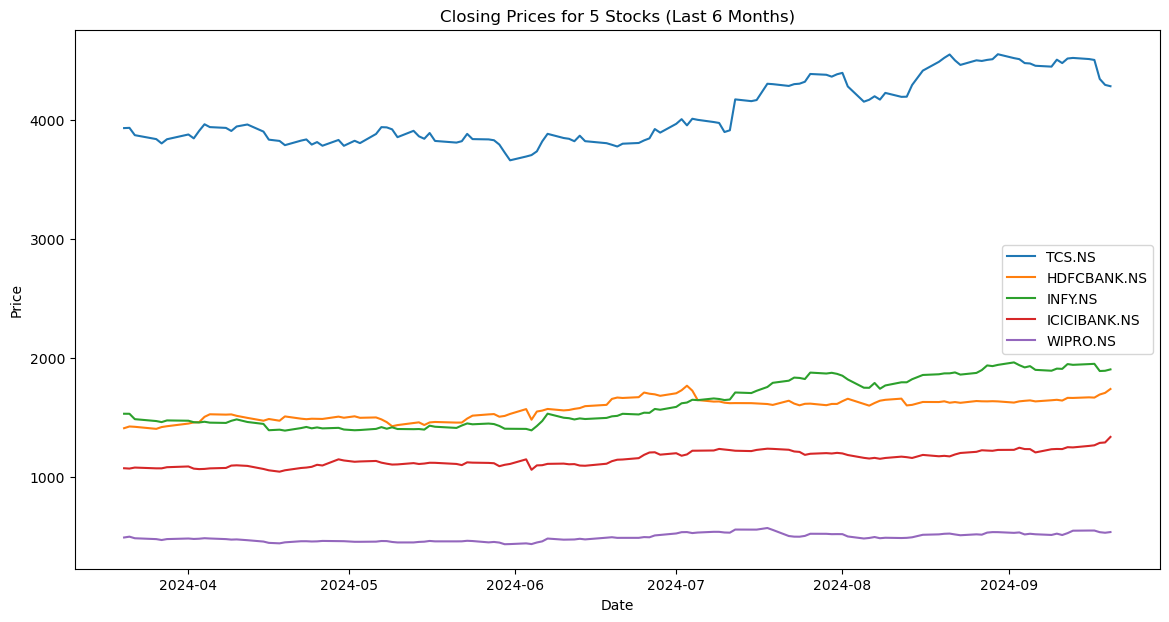

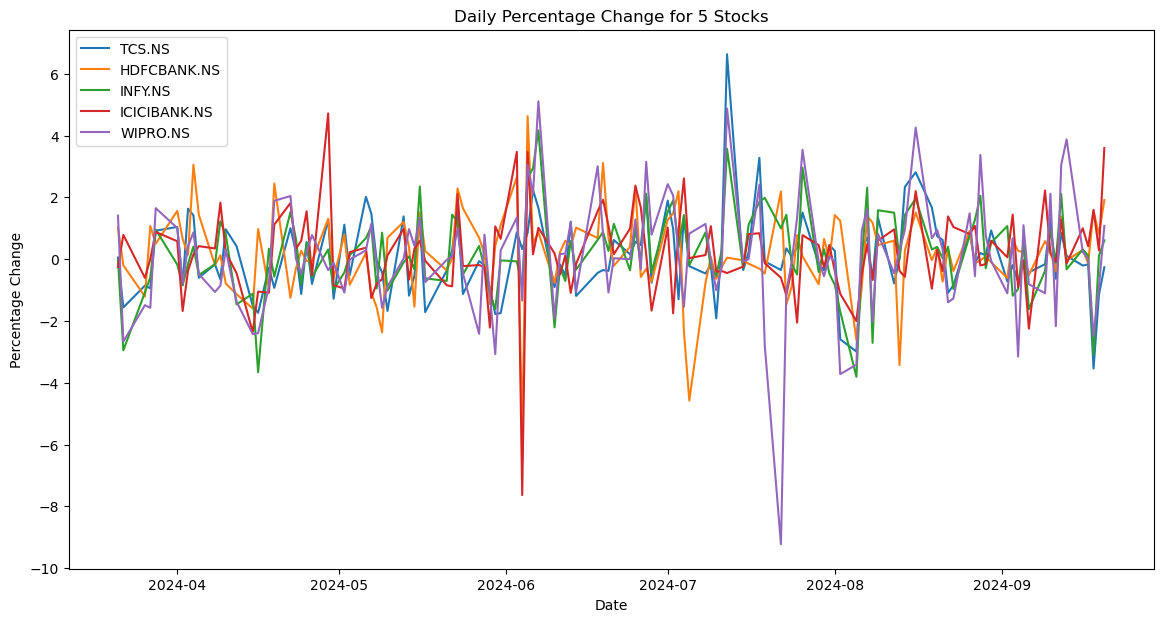

In [9]:
# Step 3: Plot the closing prices for the 5 stocks
plt.figure(figsize=(14, 7))
for stock in stocks:
    plt.plot(data['Adj Close'][stock], label=stock)
plt.title('Closing Prices for 5 Stocks (Last 6 Months)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Step 3: Plot the daily percentage changes
plt.figure(figsize=(14, 7))
for stock in stocks:
    plt.plot(daily_pct_change[stock], label=stock)
plt.title('Daily Percentage Change for 5 Stocks')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.show()


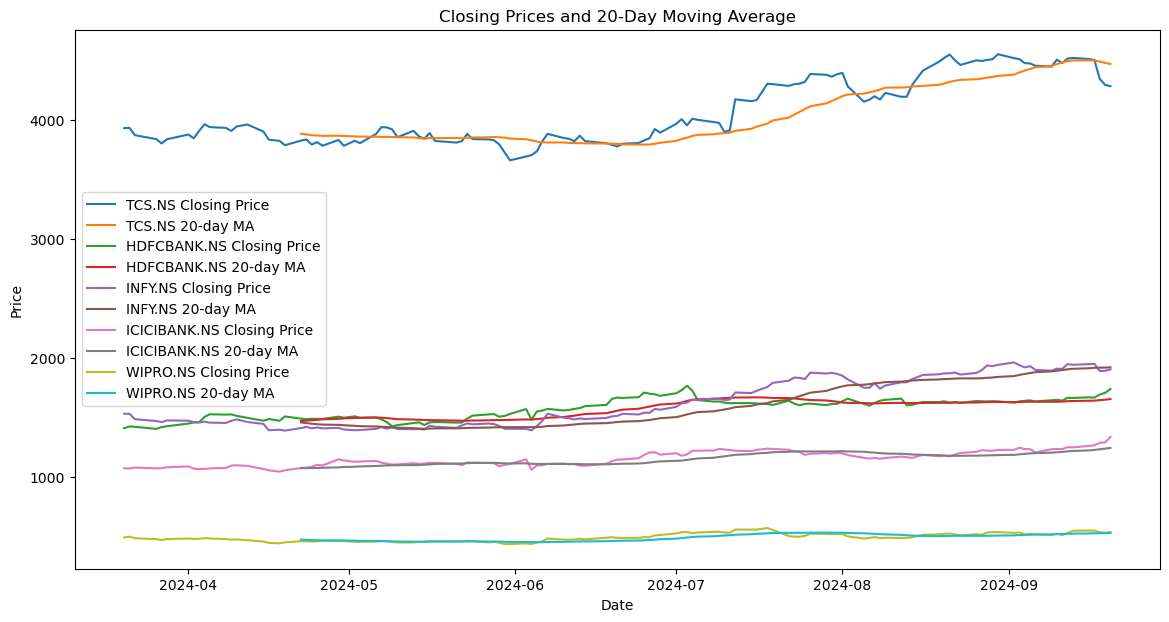

In [11]:
# Step 4: Calculate the 20-day moving average for each stock
moving_avg = data['Adj Close'].rolling(window=20).mean()

# Plot the 20-day moving average alongside the closing price
plt.figure(figsize=(14, 7))
for stock in stocks:
    plt.plot(data['Adj Close'][stock], label=f'{stock} Closing Price')
    plt.plot(moving_avg[stock], label=f'{stock} 20-day MA')
plt.title('Closing Prices and 20-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



Task 2: Strategy Development

Step 1: Simple Moving Average Crossover Strategy
In this task, we develop a moving average crossover strategy for one stock, TCS. The strategy uses two moving averages:

A short-term moving average (50-day)
A long-term moving average (200-day)
The strategy works like this:

A buy signal is generated when the 50-day moving average crosses above the 200-day moving average (indicating a bullish trend).
A sell signal is generated when the 50-day moving average crosses below the 200-day moving average (indicating a bearish trend).
Step 2: Backtest Strategy to Identify Buy and Sell Signals
We backtest the strategy by applying it to the historical data. We generate buy and sell signals based on the moving average crossover points and visualize these signals on the stock’s price chart.

Step 3: Compare Strategy Returns with Buy-and-Hold
Next, we calculate the returns generated by the strategy compared to a simple buy-and-hold approach. In a buy-and-hold strategy, you buy the stock at the beginning and hold it for the entire period. We compare this with the returns from the moving average strategy to see which approach performs better.

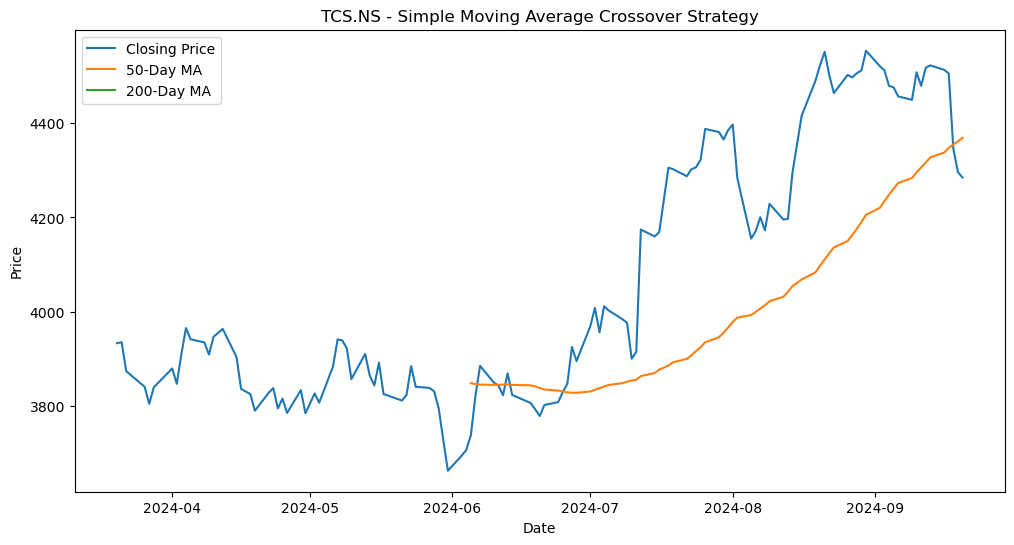

In [13]:
# Step 1: Choose 'TCS.NS' for the moving average crossover strategy
stock = 'TCS.NS'

# Calculate short-term (50-day) and long-term (200-day) moving averages
data['50_MA'] = data['Adj Close'][stock].rolling(window=50).mean()
data['200_MA'] = data['Adj Close'][stock].rolling(window=200).mean()

# Plot the moving averages with the closing price
plt.figure(figsize=(12, 6))
plt.plot(data['Adj Close'][stock], label='Closing Price')
plt.plot(data['50_MA'], label='50-Day MA')
plt.plot(data['200_MA'], label='200-Day MA')
plt.legend()
plt.title(f'{stock} - Simple Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


C:\Users\jkrid\AppData\Local\Temp\ipykernel_1264\3238964674.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['50_MA'][50:] > data['200_MA'][50:], 1, 0)  # Buy signal when 50-MA > 200-MA


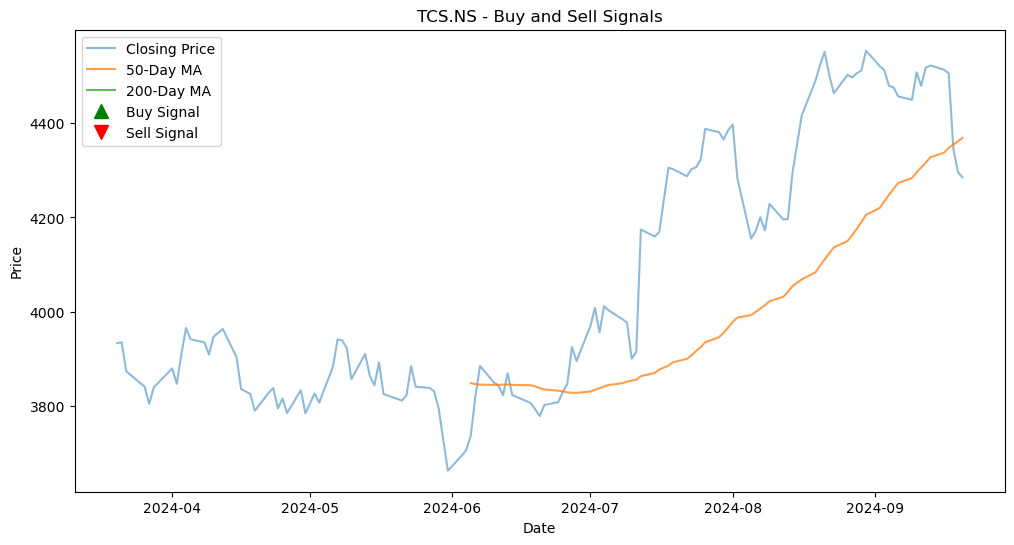

In [15]:
# Step 2: Create buy and sell signals based on moving average crossovers
data['Signal'] = 0
data['Signal'][50:] = np.where(data['50_MA'][50:] > data['200_MA'][50:], 1, 0)  # Buy signal when 50-MA > 200-MA
data['Position'] = data['Signal'].diff()  # Generate buy/sell signals

# Plot Buy and Sell signals on the price chart
plt.figure(figsize=(12, 6))
plt.plot(data['Adj Close'][stock], label='Closing Price', alpha=0.5)
plt.plot(data['50_MA'], label='50-Day MA', alpha=0.75)
plt.plot(data['200_MA'], label='200-Day MA', alpha=0.75)

# Mark buy signals
plt.plot(data[data['Position'] == 1].index, data['50_MA'][data['Position'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')

# Mark sell signals
plt.plot(data[data['Position'] == -1].index, data['50_MA'][data['Position'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title(f'{stock} - Buy and Sell Signals')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [17]:
# Step 3: Calculate Buy and Hold returns
buy_and_hold_return = (data['Adj Close'][stock][-1] / data['Adj Close'][stock][0]) - 1

# Calculate Strategy returns
data['Strategy_Return'] = data['Adj Close'][stock].pct_change() * data['Signal'].shift(1)
cumulative_strategy_return = (data['Strategy_Return'] + 1).cumprod()[-1] - 1

# Display the returns for comparison
print(f'Buy and Hold Return: {buy_and_hold_return * 100:.2f}%')
print(f'Strategy Return: {cumulative_strategy_return * 100:.2f}%')


Buy and Hold Return: 8.94%
Strategy Return: 0.00%


C:\Users\jkrid\AppData\Local\Temp\ipykernel_1264\4094862402.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  buy_and_hold_return = (data['Adj Close'][stock][-1] / data['Adj Close'][stock][0]) - 1
C:\Users\jkrid\AppData\Local\Temp\ipykernel_1264\4094862402.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_strategy_return = (data['Strategy_Return'] + 1).cumprod()[-1] - 1



Task 3: Risk Management

Step 1: Calculate Maximum Drawdown
Maximum drawdown is the largest drop from the highest point to the lowest point over the entire period. This helps measure the risk associated with each stock, indicating the worst-case scenario in terms of losses. We calculate the maximum drawdown for each stock in our dataset to assess their risk over the last 6 months.

Step 2: Implement Stop-Loss Mechanism
For risk management, we implement a stop-loss mechanism. In this case, we assume a 5% stop-loss, meaning that if the stock price drops by 5% or more, we sell the stock to prevent further losses.

We re-run the moving average crossover strategy with this stop-loss in place and compare its performance to the original strategy without a stop-loss. This allows us to evaluate if the stop-loss helped improve returns or reduce losses.

In [19]:
# Step 1: Define a function to calculate the maximum drawdown
def max_drawdown(price_data):
    roll_max = price_data.cummax()
    daily_drawdown = price_data / roll_max - 1
    return daily_drawdown.min()

# Calculate the maximum drawdown for each stock
for stock in stocks:
    drawdown = max_drawdown(data['Adj Close'][stock])
    print(f'Maximum Drawdown for {stock}: {drawdown * 100:.2f}%')


Maximum Drawdown for TCS.NS: -7.64%
Maximum Drawdown for HDFCBANK.NS: -9.47%
Maximum Drawdown for INFY.NS: -9.24%
Maximum Drawdown for ICICIBANK.NS: -7.65%
Maximum Drawdown for WIPRO.NS: -15.39%


In [21]:
# Step 2: Implementing a 5% stop-loss mechanism
stop_loss = 0.05
data['Stop_Loss_Signal'] = np.where(data['Adj Close'][stock].pct_change() <= -stop_loss, -1, data['Signal'])

# Calculate strategy returns with stop loss
data['Stop_Loss_Strategy_Return'] = data['Adj Close'][stock].pct_change() * data['Stop_Loss_Signal'].shift(1)
cumulative_stop_loss_return = (data['Stop_Loss_Strategy_Return'] + 1).cumprod()[-1] - 1

# Compare original and stop-loss strategy returns
print(f'Strategy Return with Stop Loss: {cumulative_stop_loss_return * 100:.2f}%')
print(f'Original Strategy Return: {cumulative_strategy_return * 100:.2f}%')


Strategy Return with Stop Loss: 1.04%
Original Strategy Return: 0.00%


C:\Users\jkrid\AppData\Local\Temp\ipykernel_1264\3167498419.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_stop_loss_return = (data['Stop_Loss_Strategy_Return'] + 1).cumprod()[-1] - 1



Summary

In Task 1, we explored and visualized historical stock data, daily price changes, and moving averages to understand trends and volatility.
In Task 2, we developed and backtested a simple moving average crossover strategy for TCS, and compared the returns with a buy-and-hold strategy.
In Task 3, we calculated the maximum drawdown for each stock to measure risk, and implemented a stop-loss mechanism to manage risk in the trading strategy.